![aims_logo.png](attachment:aims_logo.png)

## MACHINE LEARNING PROJECT

GROUP CODE: GRP6700RV

# Introduction
The project focused on classifying fraud transactions from normal transactions using data with 284,807 observations against 30 features. After exploratory data analysis and preprocessing we notice that the distribution of the two classes is biased in favor of the normal transactions, thus, fraud transaction is less than 0.2% of the total observations. We therefore employed various techniques necessary to make meaning to the classification algorithms and performances using the Support Vector Machine, Random Forest Classifier and Artificial Neural Network models.


# Summary
### In a nutshell, below is what is contained in this notebook;
- First, after data cleaning and preprocessing we performed train-test-split on the data as it was and fitted the models and measured the performances. The performance was good for Random Forest as compared to the other two models, however, there were some improvement we adjusted to. And one major discovery was the fact the model performances will be best measured by F1-score, while giving credits to Precision and Recall either than just accuracy which seemed to favor the prediction power for the majority class.

- Secondly, we did cross validation using StratifiedKFold to check the possibility of best split and performances since StratifiedKFold gives credits to the minority class during the splitting of each fold. The results was good in all cases of the Random Forest Classifier than SVM and ANN.

- Moreover, and lastly we employed the techniques of resampling from both majority class in the case of undersampling and also the minority class in the case of oversampling to fit each model and measure the performance. In the case of undersampling, due to lost of data during resampling of the majority class, the models all did not performed well but for the case of oversampling the minority class, the model had enough data to fit and made good performances. Among the three models Random Forest Classifier performed better and hence was the best classifier. 

##### Standard Modules Importations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import warnings

warnings. simplefilter(action = "ignore", category = Warning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/KOBBY/ML_project/fraud.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- We shall explore the data to see if we have some cleaning to do.

In [ ]:
## We shall check for the number of features and observations we have in our datasets.
data.shape

(284807, 31)

- We have $ 284, 807 $ observations against $30$ features.

We will visualize the data distribution from the Class varibale

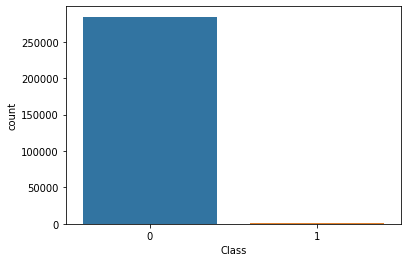

In [ ]:
## We want to see if we have a fair distribution of our dataset for a model to learn from.

import seaborn as sns

sns.countplot(data['Class'])

- It is clearly seen by the count plot that the data distribution for the Class is higher in class 1 than class 0. 

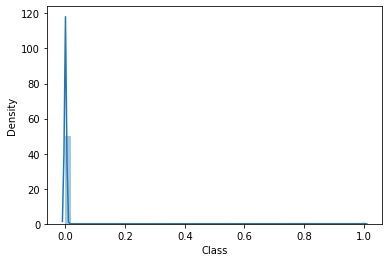

In [ ]:
### Data distribution plot
sns.distplot(data['Class'])

- Using the distribution plot we can see that almost all our data is highly densed on one class where the other class is approximately zero. 

In [ ]:
from scipy.stats import norm, skew
print("Skewness: %f" % data['Class'].skew())
print("Kurtosis: %f" % data['Class'].kurt())

Skewness: 23.997579
Kurtosis: 573.887843


Skewness is a measure of the symmetry in a distribution.  A symmetrical dataset will have a skewness equal to 0.  So, a normal distribution will have a skewness of 0.   Skewness essentially measures the relative size of the two tails. Hence;

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed and this is exactly our case. 

Similary;
Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  
- If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  
- If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails). 
- Therefore we can conclude that the dataset has heavier tails than a normally distributed data and hence we will handle such cases strategically in curb the robustness in the model performance.

### Descriptive Analysis

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###### Pearson Correlation Matrix

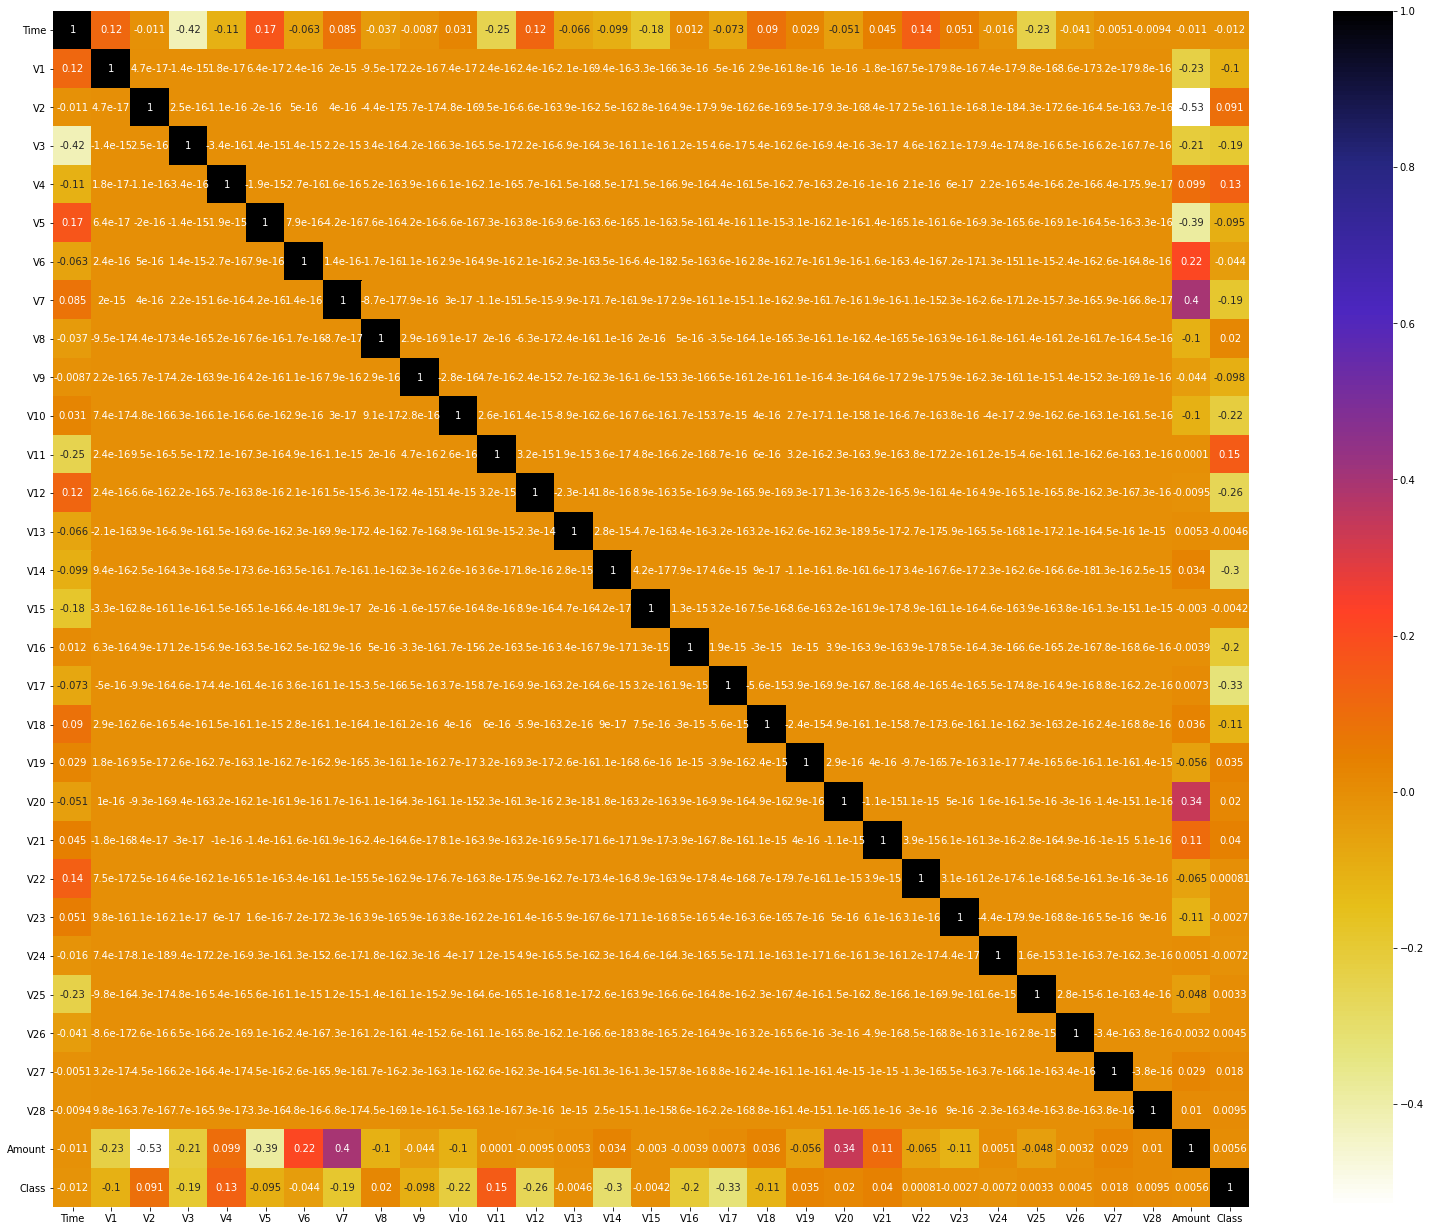

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize = (30,22))
sns.heatmap(
    correlation_matrix, annot = True,
    square = True,
    cmap = plt.cm.CMRmap_r
)
plt.show()

- There is an inverse correlation between the time variables and the target. Also amount has a correlation between with the target.

### Data Cleaning 

In [ ]:
## checking for the types of inputs in our data
data.dtypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Let's check for nan values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Fortunately we have no 'Nan' values to deal with in our data.

- We also have no object types to handle. This sounds good so far.

In [ ]:
### We shall check for duplicates observations in the datasets.

duplicates = [data[data.duplicated()==True]][0] # Since this returns a list of dataframe we shall pick by slicing 
print(duplicates.Class.value_counts())
duplicates.head()

0    1062
1      19
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [ ]:
## We shall drop all the duplicates
new_data = data.drop_duplicates()

### The data is cleared of duplicates
new_data.duplicated()[0]

False

In [ ]:
### creating a copy of the data
df = new_data.copy()

In [ ]:
### Getting data ready for training and testing

X = df.drop(columns = ['Class'])  ### extracting the features into 'X'
y = df[['Class']]   #### also extracting the response into the vector 'y'

In [ ]:
### standard train and test importation from the sci-kit learn for data splitting.

from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y, train_size = 0.8, random_state = 22)  ### maintaining train-size of 70% after splitting with 30% testing

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape  ### Checking the size of train and test splits.

((226980, 30), (56746, 30), (226980, 1), (56746, 1))

In [ ]:
### Distribution of each class for fitting and testing without preprocessing
y_train_ = pd.DataFrame(y_train)
y_train_['Class'].value_counts()

0    226604
1       376
Name: Class, dtype: int64

In [ ]:
### We shall use this function for various split while working through this notebook.
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X,y, test_size=0.2, random_state=22)

In [ ]:
### importing the classifier from the ensemble library within sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
### Class of models we shall call to check th score and return the model when necessary.
### instantiating the models
class models:
    def __init__(self, fun):
        self.fun = fun
    
    def random_forest(fun):
        X_train, X_test, y_train, y_test = fun
        RFC = RandomForestClassifier(n_estimators = 100,random_state = 58)
        RFC.fit(X_train,y_train)
        Random_Forest_score = RFC.score(X_test,y_test)
        return Random_Forest_score,RFC

    def support_vector_machine(fun):
        X_train, X_test, y_train, y_test = fun
        svm_clf = SVC(C=1.0, kernel='rbf', random_state = 0)
        svm_clf.fit(X_train,y_train)
        svm_score = svm_clf.score(X_test,y_test)
        return svm_score, svm_clf


    def ann():
        
        model = keras.Sequential([
        keras.layers.Dense(units = 500, input_shape = (30,),kernel_initializer = 'he_uniform', activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units = 200,kernel_initializer = 'he_uniform', activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid')
            ])  #### ANN with two hidden layers.

        model.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
        return model

### SUPPORT VECTOR MACHINE

In [ ]:

### Getting score and model for SVM classifier for classification report
svm_score, svm = models.support_vector_machine(split(X,y))

### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score
X_train, X_test, y_train,y_test = split(X,y)
svm_preds = svm.predict(X_test)
print(confusion_matrix(y_test,svm_preds))
print(classification_report(y_test, svm_preds))
print(svm_score)

[[56649     0]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

0.9982906284143376


- Support Vector Machine irrespective of the high score has a very poor performance for recall and f1-score.

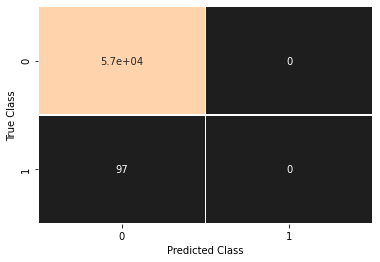

In [ ]:
cm_svm = confusion_matrix(y_test,svm_preds)
plt.figure(figsize = (6,4))
sns.heatmap(cm_svm,annot = True,
            linewidths = .5,
            center = 0,
            cbar = False, 
            cmap = None)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
##Getting score and model for classification report on the model performance
rfc_score, rfc = models.random_forest(split(X,y))

### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score

X_train, X_test, y_train,y_test = split(X,y)
rfc_preds = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds))
print(classification_report(y_test, rfc_preds))
print(rfc_score)

[[56641     8]
 [   18    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.91      0.81      0.86        97

    accuracy                           1.00     56746
   macro avg       0.95      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746

0.9995418179254926


- Random forest has good performance and recall and f1-score is better than Support Vector Machine. 

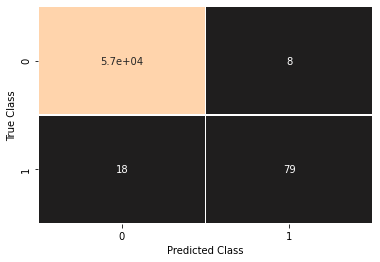

In [ ]:
cm_rfc = confusion_matrix(y_test,rfc_preds)
plt.figure(figsize = (6,4))
sns.heatmap(cm_rfc,annot = True,
            linewidths = .5,
            center = 0,
            cbar = False, 
            cmap = None)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
### instantiating the ann from the class models and fitting for prediction
ann = models.ann()
ann.fit(X_train,y_train, batch_size = 100, validation_data=(X_test,y_test),epochs = 10)

Epoch 1/10
2270/2270 [==============================] - 26s 11ms/step - loss: 109.6742 - accuracy: 0.9960 - val_loss: 0.1703 - val_accuracy: 0.9983
Epoch 2/10
2270/2270 [==============================] - 24s 11ms/step - loss: 0.4238 - accuracy: 0.9975 - val_loss: 0.0294 - val_accuracy: 0.9983
Epoch 3/10
2270/2270 [==============================] - 24s 11ms/step - loss: 0.1877 - accuracy: 0.9982 - val_loss: 0.0160 - val_accuracy: 0.9983
Epoch 4/10
2270/2270 [==============================] - 25s 11ms/step - loss: 0.0853 - accuracy: 0.9983 - val_loss: 0.0132 - val_accuracy: 0.9983
Epoch 5/10
2270/2270 [==============================] - 23s 10ms/step - loss: 0.0317 - accuracy: 0.9984 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
2270/2270 [==============================] - 23s 10ms/step - loss: 0.0416 - accuracy: 0.9983 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 7/10
2270/2270 [==============================] - 23s 10ms/step - loss: 0.0220 - accuracy: 0.9983 - val_loss: 0.0126

In [ ]:
### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score

X_train, X_test, y_train,y_test = split(X,y)
ann.evaluate(X_test,y_test)
ann_preds = np.round(ann.predict(X_test))
#ann_preds = [np.argmax(i) for i in ann_preds]
print(confusion_matrix(y_test,ann_preds))
print(classification_report(y_test, ann_preds))

1774/1774 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9983
[[56649     0]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



- Artificial Neural Network does not perform better for our data structure. The model is not able to learn for the fraud class. Although is has a high accuracy precision, recall and f1-score is extremely poor and hence not good.

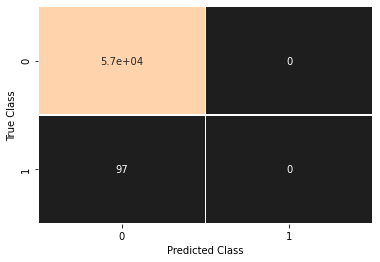

In [ ]:
cm_ann = confusion_matrix(y_test,ann_preds)
plt.figure(figsize = (6,4))
sns.heatmap(cm_ann,annot = True,
            linewidths = .5,
            center = 0,
            cbar = False, 
            cmap = None)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

- The confusion matrix shows that the predictions for the class 0 was not learned  by the neural network. We shall look for ways to improve this problem.

## Preprocessing 

In [ ]:
## Scaling the 'Time' and 'Amount'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Time', 'Amount']]=scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']]=scaler.fit_transform(X_test[['Time', 'Amount']])

### Random forest classifier

In [ ]:
rfc_score, rfc = models.random_forest(split(X_train,y_prep))

### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score
X_train_new, X_test_new, y_train_new,y_test_new = split(X_prep,y_prep)

rfc_preds_new = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds_new))
print(classification_report(y_test, rfc_preds_new))
print(rfc_score)

[[56638    11]
 [   18    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.88      0.81      0.84        97

    accuracy                           1.00     56746
   macro avg       0.94      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746

0.9995418179254926


- Random Forest Classifier without preprocessing

In [ ]:
## After preprocessing
RFC= RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RFC_pred = RFC.predict(X_test)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test, RFC_pred))

[[56643     6]
 [   18    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.93      0.81      0.87        97

    accuracy                           1.00     56746
   macro avg       0.96      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746



- Random Forest performance did not change hugely after preprocessing 

### Support Vector Classifier 

In [ ]:
### Getting score and model for SVM classifier for classification report
svm_score, svm = models.support_vector_machine(split(X_prep,y_prep))

### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score
X_train_new, X_test_new, y_train_new,y_test_new = split(X_prep,y_prep)
svm_preds_new = svm.predict(X_test)
print(confusion_matrix(y_test,svm_preds_new))
print(classification_report(y_test, svm_preds_new))
print(svm_score)

[[56649     0]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

0.9994889507630493


- Support Vector Machine with the raw data without preprocessing

In [ ]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#After preprocessing 

svm_pred = svm.predict(X_test)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test, svm_pred))

[[56644     5]
 [   24    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.94      0.75      0.83        97

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



- Support Vector Machine has performed pretty good after preprocessing. Classification report is better than before.

### Artificial Neural Network

In [ ]:
ann = models.ann()
model_hist = ann.fit(X_train_new,y_train_new, batch_size = 100, validation_data=(X_test,y_test),epochs = 8)

Epoch 1/8
2270/2270 [==============================] - 26s 11ms/step - loss: 0.0329 - accuracy: 0.9956 - val_loss: 287.4443 - val_accuracy: 0.9983
Epoch 2/8
2270/2270 [==============================] - 25s 11ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 293.4338 - val_accuracy: 0.9983
Epoch 3/8
2270/2270 [==============================] - 26s 11ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 342.2417 - val_accuracy: 0.9983
Epoch 4/8
2270/2270 [==============================] - 32s 14ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 314.7098 - val_accuracy: 0.9983
Epoch 5/8
2270/2270 [==============================] - 25s 11ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 401.4920 - val_accuracy: 0.9983
Epoch 6/8
2270/2270 [==============================] - 26s 11ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 565.1943 - val_accuracy: 0.9983
Epoch 7/8
2270/2270 [==============================] - 30s 13ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 254

In [ ]:
ann.evaluate(X_test_new,y_test_new)
ann_preds_new = np.round(ann.predict(X_test))
print(confusion_matrix(y_test_new,ann_preds_new))
print(classification_report(y_test, ann_preds_new))

1774/1774 [==============================] - 6s 3ms/step - loss: 0.0026 - accuracy: 0.9995
[[56649     0]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



- Before preprocessing ANN performance did not realize any improvement on the dataset.

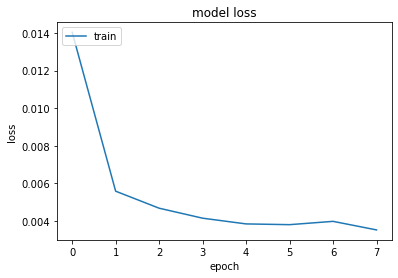

In [ ]:
## For visualization  of the convergence
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Training has a good convergence but it does not perform well for the dataset, hence the very weak performance of the Neural Network.

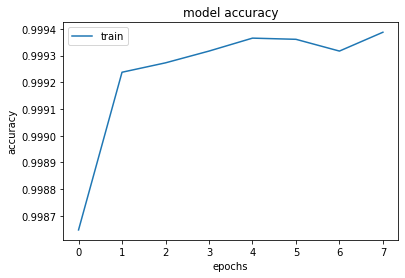

In [ ]:
### for accuracy performance with regards to epochs
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Though training accuracy seem to have a significant increment measure it does not reflect in the original dataset structure.

In [ ]:
ann = models.ann()
model_history = ann.fit(X_train,y_train, batch_size = 100, validation_data=(X_test,y_test),epochs = 8)

Epoch 1/8
2270/2270 [==============================] - 47s 20ms/step - loss: 0.0250 - accuracy: 0.9973 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 2/8
2270/2270 [==============================] - 43s 19ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/8
2270/2270 [==============================] - 44s 19ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 4/8
2270/2270 [==============================] - 43s 19ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/8
2270/2270 [==============================] - 43s 19ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 6/8
2270/2270 [==============================] - 47s 20ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 7/8
2270/2270 [==============================] - 47s 21ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0024 - val_ac

In [ ]:
ann.evaluate(X_test,y_test)
ann_pred = np.round(ann.predict(X_test))
print(confusion_matrix(y_test,ann_pred))
print(classification_report(y_test, ann_pred))

1774/1774 [==============================] - 8s 5ms/step - loss: 0.0024 - accuracy: 0.9995
[[56639    10]
 [   17    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.89      0.82      0.86        97

    accuracy                           1.00     56746
   macro avg       0.94      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746



- Neural Network performance after preprocessing. It also showed improvement after preprocessing 

### Using stratifiedKFold sampling technique as a way of curbing the biasedness of the class distribution in our data.

In [ ]:
## Converting the input and output dataframe into numpy arrays
X_new,y_new = X.values, y.values

In [ ]:
 # Importing necessary libraries for the StratifiedKFold split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
SVM = SVC(random_state = 40)  ### instantiating the model with some necessary parameters
RFC = RandomForestClassifier(n_estimators = 120, random_state = 58) ### instantiating our random_forest
folds = StratifiedKFold(n_splits=5) ### instantiating the stratifiedkfold with 5 number of splits.

### a function that takes the model, fit the model for each split and then computer the score
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    return model.score(X_test, y_test)

### initiating an empty list to record the score for each split
scores_svm = []
scores_rf = []

#### looping through all the splitted data and appending the score for each split using the get_score function.
for train_index, test_index in folds.split(X,y): 
    X_train, X_test, y_train, y_test = X_new[train_index], X_new[test_index], y_new[train_index], y_new[test_index] 
    scores_svm.append(get_score(SVM, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RFC, X_train, X_test, y_train, y_test))
    
### printing out the scores
print(scores_svm)
print(scores_rf)

[[56827    36]
 [   33    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.65      0.67      0.66        99

    accuracy                           1.00     56962
   macro avg       0.82      0.83      0.83     56962
weighted avg       1.00      1.00      1.00     56962

[[56824    39]
 [   12    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.69      0.88      0.77        99

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56861     2]
 [   52    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.47      0.64        99

    accuracy                           1.00     56962
   macro avg       0.98      0.74  

- Here we used StratifiedKFold split to make confirmation on the possibility of getting a good score as compared to the previous performances on the models, that is,  if we seek to improve the performance of the best model, thus, Random Forest Classifier in making much meaning to the minority class in the model's learning. And it is envidenced from the classification report that we can get a set of split of our data that gives us the best performance for Random Forest Classifier. In the other case of Support Vector Machine, just like the original data SVM does not seeem to perform better for this kind of dataset.

## ARTIFICIAL NEURAL NETWORK MODEL

In [ ]:
# Using stratifiedKFold with different epochs and batch_size
folds = StratifiedKFold(n_splits=5) ### instantiating the stratifiedkfold with 5 number of splits.

params = {'epochs':[10], 'batch_size':[100]}
Evaluation_score = [] # recording each evaluation in all the iterations

for epochs, batch_size in zip(params['epochs'], params['batch_size']):
    for train_index, test_index in folds.split(X_new,y_new):
        X_train, X_test, y_train, y_test = X_new[train_index], X_new[test_index], y_new[train_index], y_new[test_index]
        ann = models.ann()
        ann.fit(X_train,y_train, batch_size = batch_size, validation_data=(X_test,y_test),epochs = epochs)
        y_pred = np.round(ann.predict(X_test))
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test, y_pred))
        Evaluation_score.append(ann.evaluate(X_test,y_test))
print(Evaluation_score)

Epoch 1/10
2270/2270 [==============================] - 13s 6ms/step - loss: 399.4626 - accuracy: 0.9928 - val_loss: 0.1544 - val_accuracy: 0.9983
Epoch 2/10
2270/2270 [==============================] - 13s 6ms/step - loss: 2.8282 - accuracy: 0.9962 - val_loss: 0.0665 - val_accuracy: 0.9983
Epoch 3/10
2270/2270 [==============================] - 13s 6ms/step - loss: 0.2879 - accuracy: 0.9980 - val_loss: 0.0205 - val_accuracy: 0.9983
Epoch 4/10
2270/2270 [==============================] - 13s 6ms/step - loss: 0.0762 - accuracy: 0.9983 - val_loss: 0.0139 - val_accuracy: 0.9983
Epoch 5/10
2270/2270 [==============================] - 13s 6ms/step - loss: 0.0862 - accuracy: 0.9983 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 6/10
2270/2270 [==============================] - 12s 5ms/step - loss: 0.0192 - accuracy: 0.9983 - val_loss: 0.0124 - val_accuracy: 0.9983
Epoch 7/10
2270/2270 [==============================] - 12s 5ms/step - loss: 0.0201 - accuracy: 0.9984 - val_loss: 0.0124 - val_

Artificial did not perform better after the StratifiedKFold split. Hence it will definitely not be good for this type of classification unless preprocessed with scaled data.

### Data statistics under the following "Imbalance learning" topics to conclude on the best model.

1) Under Sampling 

2) Over Sampling

### We shall under sample from the majority class for training and test on the original train-test-split and measure the performance against the previous records.

In [ ]:
##### Let define a function for the two classifiers, SVM and Random Forest

def rfc_sample(X_train_sample, y_train_sample,X_test,y_test):
    rfc_us = RandomForestClassifier(n_estimators = 100, random_state=100)
    rfc_us.fit(X_train_sample, y_train_sample)
    
    #### Now we use the model to make predictions on the entire data and then check for the precision, recall and fi-score
    us_preds = rfc_us.predict(X_test)
    print(confusion_matrix(y_test,us_preds))
    print(classification_report(y_test, us_preds))
    print(rfc_us.score(X_test,y_test))
    return rfc_us


def svm_sample(X_train_sample, y_train_sample,X_test,y_test):
    svm_all = SVC(random_state=60)
    svm_all.fit(X_train_sample, y_train_sample)
    #### Now we use the model to make predictions on the entire data and then check for the precision, recall and fi-score
    us_preds = svm_all.predict(X_test)
    print(confusion_matrix(y_test,us_preds))
    print(classification_report(y_test, us_preds))
    print(svm_all.score(X_test,y_test))
    return svm_all

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
## Resampling strategy of 0.9 ratio between minority and the majority class. 
us = NearMiss(0.9)

In [ ]:
### resampling the train data
X_train_us, y_train_us = us.fit_resample(X_train,y_train)

In [ ]:
#### The composition of the data distribution before undersampling

print(y_train.Class.value_counts())

0    226604
1       376
Name: Class, dtype: int64


In [ ]:
y_train_us_df = pd.DataFrame(y_train_us, columns = ['Class'])

In [ ]:
### The composition of the data after the undersampling in the ratio 0.9
print(y_train_us_df.Class.value_counts())

0    417
1    376
Name: Class, dtype: int64


### RandomForestClassifier for Undersampled Datasets

In [ ]:
rfc_sample(X_train_us, y_train_us, X_test,y_test)

[[49511  7138]
 [    4    93]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     56649
           1       0.01      0.96      0.03        97

    accuracy                           0.87     56746
   macro avg       0.51      0.92      0.48     56746
weighted avg       1.00      0.87      0.93     56746

0.8741409086102985


RandomForestClassifier(random_state=100)

- Here after undersampling technique it is observed that accuracy is reduced which is very obvious since almost all the information were lost during the undersampling and hence leading to poor performance of the model for the class 0. 

### Support Vector Classifier for Undersampled data

In [ ]:
svm_sample(X_train_us, y_train_us, X_test,y_test)

[[38273 18376]
 [   73    24]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     56649
           1       0.00      0.25      0.00        97

    accuracy                           0.67     56746
   macro avg       0.50      0.46      0.40     56746
weighted avg       1.00      0.67      0.80     56746

0.674884573361999


SVC(random_state=60)

- Support Vector Machine also performed very bad for precision and f1-score. Hence our undersampling technique does not favor our objectives here.

### ANN for Undersampled Data

In [ ]:
### Just call the ann from class function
model=models.ann()
model.fit(X_train_us,y_train_us, batch_size=10, epochs=11, validation_data=(X_test, y_test))

Epoch 1/11
80/80 [==============================] - 7s 76ms/step - loss: 11610.5369 - accuracy: 0.4911 - val_loss: 6559.6191 - val_accuracy: 0.0017
Epoch 2/11
80/80 [==============================] - 6s 81ms/step - loss: 5231.8840 - accuracy: 0.4982 - val_loss: 0.6788 - val_accuracy: 0.9902
Epoch 3/11
80/80 [==============================] - 6s 78ms/step - loss: 2946.2486 - accuracy: 0.5072 - val_loss: 0.1047 - val_accuracy: 0.9975
Epoch 4/11
80/80 [==============================] - 6s 80ms/step - loss: 1122.7972 - accuracy: 0.4726 - val_loss: 27.2579 - val_accuracy: 0.0022
Epoch 5/11
80/80 [==============================] - 8s 96ms/step - loss: 378.4566 - accuracy: 0.5317 - val_loss: 0.1665 - val_accuracy: 0.9981
Epoch 6/11
80/80 [==============================] - 8s 96ms/step - loss: 123.5773 - accuracy: 0.5140 - val_loss: 0.6855 - val_accuracy: 0.9981
Epoch 7/11
80/80 [==============================] - 7s 92ms/step - loss: 107.4097 - accuracy: 0.5039 - val_loss: 0.6837 - val_accurac

In [ ]:
#### We make predictions and check the metrics for the performance of the Artificial Neural Network.
model.evaluate(X_test_new,y_test_new)
us_preds = np.round(model.predict(X_test))
#ann_us_preds = [np.argmax(i) for i in ann_preds]
print(confusion_matrix(y_test,us_preds))
print(classification_report(y_test, us_preds))

1774/1774 [==============================] - 4s 2ms/step - loss: 0.7118 - accuracy: 0.5251
[[56640     9]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



- Also, ANN performance changed after undersampling the dataset yet did not favor the fraud classification. And it seems that undersampling technique does not produce good results on the precision, recall and f1-score for all the models.

# Resampling new dataset from the minority class for training and testing

In [ ]:
### Oversampling using RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Oversampling with a ratio of 0.9 of minority class to majority class
os = RandomOverSampler(sampling_strategy=0.9)

- #### Resampling from our biased data for training and testing on the 30% test split from the entire data.

In [ ]:
X_train_os, y_train_os = os.fit_resample(X_train,y_train)

In [ ]:
### Data distribution before and after resampling.
print(y_train.Class.value_counts())
print(y_train_os.Class.value_counts())

0    226604
1       376
Name: Class, dtype: int64
0    226604
1    203943
Name: Class, dtype: int64


#### Random Forest for Oversampled data

In [ ]:
### We shall fit the new dataset and make predictions from the test split of our original data.
model_random_forest = rfc_sample(X_train_os, y_train_os, X_test,y_test)

[[56643     6]
 [   18    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.93      0.81      0.87        97

    accuracy                           1.00     56746
   macro avg       0.96      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746

0.9995770627004547


- This sampling technique seem to have outperformed the undersampling technique. This could basically be that the model has had enough data to make decision. And since precision, recall and f1-score has a very good performance here we can say that this technique prefered to the undersampling.
- Best sampling technique for the particular dataset is evidenced by the results. 

#### Support Vector for Oversampled data

In [ ]:
###  Support vector machine for Oversampled data

X_train_OS, X_test_OS, y_train_OS, y_test_OS = split(X_train_os, y_train_os)
model_svm = svm_sample(X_train_OS, y_train_OS, X_test,y_test)

- #### SVM seem not to perform well with the kind of data distribution. Hence we may conclude that SVM is not the best model for this kind of dataset.

In [ ]:
### ANN for Oversampled data
model=models.ann()
model_hist = model.fit(X_train_os,y_train_os, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4306/4306 [==============================] - 46s 11ms/step - loss: 705.2202 - accuracy: 0.5106 - val_loss: 0.6366 - val_accuracy: 0.9983
Epoch 2/10
4306/4306 [==============================] - 45s 11ms/step - loss: 0.8739 - accuracy: 0.5271 - val_loss: 0.6464 - val_accuracy: 0.9983
Epoch 3/10
4306/4306 [==============================] - 46s 11ms/step - loss: 0.7302 - accuracy: 0.5258 - val_loss: 0.6453 - val_accuracy: 0.9983
Epoch 4/10
4306/4306 [==============================] - 45s 11ms/step - loss: 0.6981 - accuracy: 0.5256 - val_loss: 0.6355 - val_accuracy: 0.9983
Epoch 5/10
4306/4306 [==============================] - 32s 7ms/step - loss: 0.6991 - accuracy: 0.5257 - val_loss: 0.6400 - val_accuracy: 0.9983
Epoch 6/10
4306/4306 [==============================] - 33s 8ms/step - loss: 0.7012 - accuracy: 0.5254 - val_loss: 0.6418 - val_accuracy: 0.9983
Epoch 7/10
4306/4306 [==============================] - 34s 8ms/step - loss: 0.6939 - accuracy: 0.5252 - val_loss: 0.6396 - 

In [ ]:
## Evaluationa nd predictions for metrics 
model.evaluate(X_test_new,y_test_new)
os_preds = np.round(model.predict(X_test))

### Printing metrics
print(confusion_matrix(y_test,os_preds))
print(classification_report(y_test, os_preds))

1774/1774 [==============================] - 4s 2ms/step - loss: 0.2150 - accuracy: 0.9983
[[56649     0]
 [   97     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



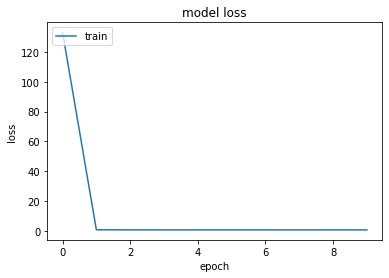

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- The model converges perfectly, however its performance on the test data is not good. 

## Conclusions 

- The dataset consisted of two different class distributions of normal transactions and fraud transactions with the fraud transaction having insignificant observations as compared to the normal transactions. Due to this we had to develop a Machine Learning algorithm that is able to make distinction between the fraud transaction despite its distribution amidst the normal transaction for future datasets. We were faced with Random Forest Classifier, Support Vector Machine and Artificial Neural Network to come out with the best model to classify fraud transactions from normal transactions. We first built our model for the biased distribution on all three models given and measured their performances based on predictions of the fraud distribution either than accuracy of the model. In order to have this metrics measured appropriately we made preference of Precision, Recall and f1-score over accuracy. 
- After the above mentioned procedure we noticed that the performance of Random Forest Classifier was good previously without any preprocessing in the first case amongst the three models and however the prediction stregnth with regards to the fraud distribution needed an improvement in the algorithm to help maximize the precision, recall and f1-score performance.
- Moreover it was observed afterwards that after some preprocessing the other two models, thus, support vector machine and artificial neural network performance was still not good as compared to that of Random Forest which had some improvements.
- Finally, the random forest came out with the best peroformance compared to the other models after preprocessing and testing the models on our original data. Hence in conclusion, the random forest classifier model is the best classifier for the fraud transactions. These conclusion are based on the results of the classification report with measurement prefence of recall, f1-score and precision. Accuracy was not much utilized as the best performance metrics in our case of this dataset.

## References

- https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
- https://imbalanced-learn.org/stable/references/generated/imblearn.metrics.sensitivity_specificity_support.html#imblearn.metrics.sensitivity_specificity_support

 ## Appendix


### Metrics summary on classification report
 - PR ----> Precision, quantifies the ability to avoid false positives.
 - RE ----> Recall, quantifies the ability to avoid false negatives.
 - CA ----> Classification_accuracy
 - $ F_1 $ ----> F1-score

![COR.jpeg](attachment:COR.jpeg)